## Imports

In [69]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

## Load data

In [70]:
data = pd.read_csv('191214-2-1_results.csv')
info = pd.read_csv('sample_info.csv')
merged = data.merge(info, on='Accession')
merged = merged.replace({'None': 'No Spin'})
merged['Description'] =  merged['centrifugation'] + ", " + merged['Deact temp'] + ", " + 'Pool ' + merged['Pool replicate'].astype(str)
merged['Pool'] = merged['Pool'].replace({3: "E.coli pos. samples", 2: "K.pneumo pos. samples"})
merged.head()

,Accession,total_reads,t7_reads,t7_normalized_reads,ecoli_reads,ecoli_normalized_reads,ecoli_coverage,kpneumo_reads,kpneumo_normalized_reads,kpneumo_coverage,...,Bacteria,Virus,Parasite,Fungus,Unclassified,Pool,Pool replicate,Deact temp,centrifugation,Description
0,IDBD-D101079,5110269,4792,9377.197169,121361,237484.562946,0.999776,903,1767.030268,0.0,...,7.865005e+06,9116.936897,5535.912102,35254.504215,1.024298e+06,E.coli pos. samples,3A,95 deg,No Spin,"No Spin, 95 deg, Pool 3A"
1,IDBD-D101080,5093381,4267,8377.539399,118790,233224.257129,1.000000,967,1898.542442,0.0,...,7.864888e+06,8071.259543,6131.487120,32102.448256,1.007317e+06,E.coli pos. samples,3B,95 deg,No Spin,"No Spin, 95 deg, Pool 3B"
2,IDBD-D101081,5533288,2953,5336.790711,164,296.387970,0.000000,136861,247341.183036,1.0,...,6.985660e+06,5739.806061,15343.499200,80603.070001,1.938233e+05,K.pneumo pos. samples,2A,95 deg,No Spin,"No Spin, 95 deg, Pool 2A"
3,IDBD-D101082,5159401,2796,5419.233744,6767,13115.863644,0.000000,132269,256365.031522,1.0,...,7.281855e+06,5814.628481,14387.329072,87769.878713,1.882990e+05,K.pneumo pos. samples,2B,95 deg,No Spin,"No Spin, 95 deg, Pool 2B"
4,IDBD-D101083,4886599,4602,9417.592890,115285,235920.729325,0.999776,821,1680.105120,0.0,...,7.652236e+06,9143.373541,7115.378201,41957.606916,1.043163e+06,E.coli pos. samples,3A,65 deg (EDTA),No Spin,"No Spin, 65 deg (EDTA), Pool 3A"


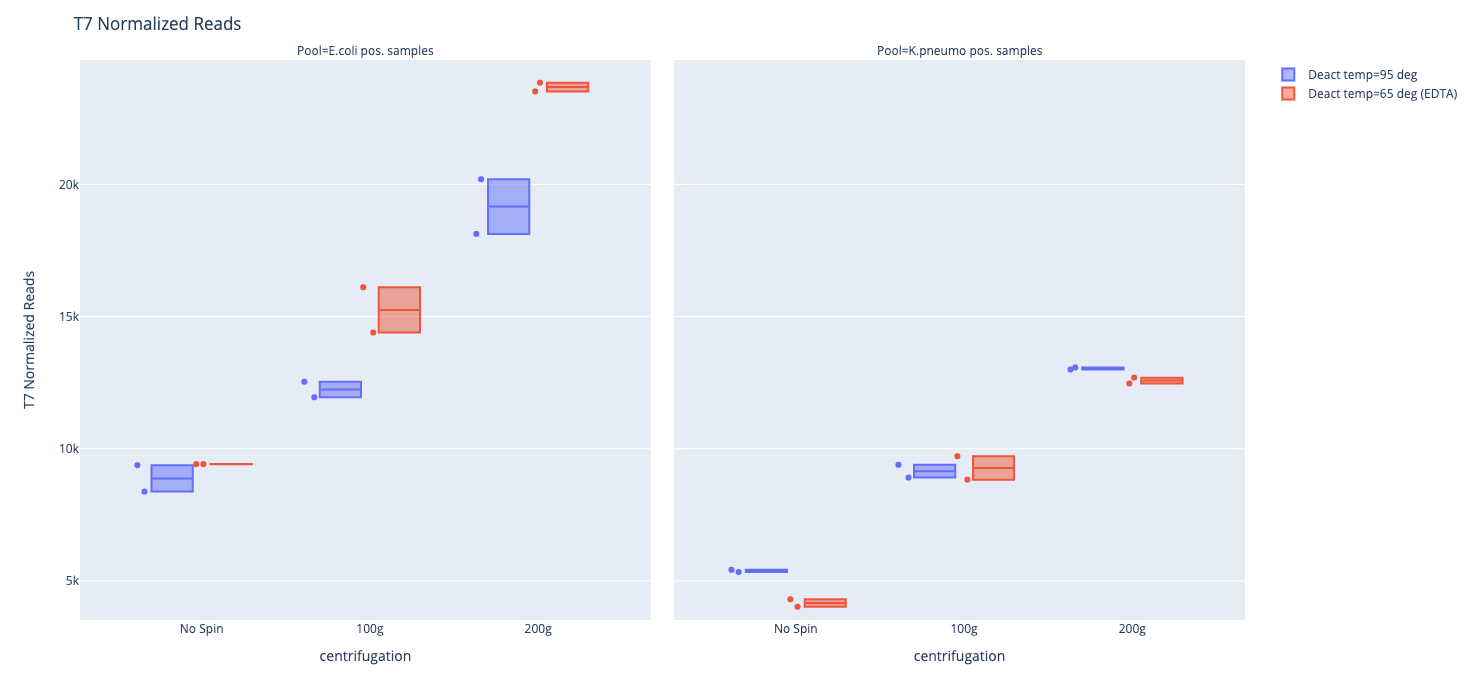

In [71]:
fig_t7 = px.box(merged, x='centrifugation', y='t7_normalized_reads', color='Deact temp',
                labels={'t7_normalized_reads': 'T7 Normalized Reads'}, points='all',
                facet_col='Pool', category_orders={'centrifugation': ['No Spin', '100g', '200g']})
fig_t7.update_layout(height=700, title='T7 Normalized Reads')
fig_t7.show()

In [78]:
~(melt['centrifugation'] == 'No Spin').sum()
melt[~(melt['centrifugation'] == 'No Spin')]

,Accession,Deact temp,centrifugation,Pool,Organism,Normalized Reads
8,IDBD-D101087,95 deg,200g,E.coli pos. samples,T7,2.019641e+04
9,IDBD-D101088,95 deg,200g,E.coli pos. samples,T7,1.812752e+04
10,IDBD-D101089,95 deg,200g,K.pneumo pos. samples,T7,1.307459e+04
11,IDBD-D101090,95 deg,200g,K.pneumo pos. samples,T7,1.299703e+04
12,IDBD-D101091,65 deg (EDTA),200g,E.coli pos. samples,T7,2.384679e+04
13,IDBD-D101092,65 deg (EDTA),200g,E.coli pos. samples,T7,2.351709e+04
14,IDBD-D101093,65 deg (EDTA),200g,K.pneumo pos. samples,T7,1.246875e+04
15,IDBD-D101094,65 deg (EDTA),200g,K.pneumo pos. samples,T7,1.268967e+04
16,IDBD-D101095,95 deg,100g,E.coli pos. samples,T7,1.194683e+04
17,IDBD-D101096,95 deg,100g,E.coli pos. samples,T7,1.253796e+04


In [101]:
merged

,Accession,total_reads,t7_reads,t7_normalized_reads,ecoli_reads,ecoli_normalized_reads,ecoli_coverage,kpneumo_reads,kpneumo_normalized_reads,kpneumo_coverage,...,Bacteria,Virus,Parasite,Fungus,Unclassified,Pool,Pool replicate,Deact temp,centrifugation,Description
0,IDBD-D101079,5110269,4792,9377.197169,121361,237484.562946,0.999776,903,1767.030268,0.0,...,7.865005e+06,9116.936897,5535.912102,35254.504215,1.024298e+06,E.coli pos. samples,3A,95 deg,No Spin,"No Spin, 95 deg, Pool 3A"
1,IDBD-D101080,5093381,4267,8377.539399,118790,233224.257129,1.000000,967,1898.542442,0.0,...,7.864888e+06,8071.259543,6131.487120,32102.448256,1.007317e+06,E.coli pos. samples,3B,95 deg,No Spin,"No Spin, 95 deg, Pool 3B"
2,IDBD-D101081,5533288,2953,5336.790711,164,296.387970,0.000000,136861,247341.183036,1.0,...,6.985660e+06,5739.806061,15343.499200,80603.070001,1.938233e+05,K.pneumo pos. samples,2A,95 deg,No Spin,"No Spin, 95 deg, Pool 2A"
3,IDBD-D101082,5159401,2796,5419.233744,6767,13115.863644,0.000000,132269,256365.031522,1.0,...,7.281855e+06,5814.628481,14387.329072,87769.878713,1.882990e+05,K.pneumo pos. samples,2B,95 deg,No Spin,"No Spin, 95 deg, Pool 2B"
4,IDBD-D101083,4886599,4602,9417.592890,115285,235920.729325,0.999776,821,1680.105120,0.0,...,7.652236e+06,9143.373541,7115.378201,41957.606916,1.043163e+06,E.coli pos. samples,3A,65 deg (EDTA),No Spin,"No Spin, 65 deg (EDTA), Pool 3A"
5,IDBD-D101084,5168739,4868,9418.157891,117513,227353.325444,0.998879,858,1659.979349,0.0,...,7.638379e+06,9176.319408,6972.687149,39092.707138,1.046884e+06,E.coli pos. samples,3B,65 deg (EDTA),No Spin,"No Spin, 65 deg (EDTA), Pool 3B"
6,IDBD-D101085,4689761,1887,4023.659201,5192,11070.926642,0.000000,97738,208407.208811,1.0,...,5.988533e+06,4723.055183,24909.584945,74082.666473,2.083475e+05,K.pneumo pos. samples,2A,65 deg (EDTA),No Spin,"No Spin, 65 deg (EDTA), Pool 2A"
7,IDBD-D101086,5273996,2271,4306.032845,5834,11061.821056,0.000000,110474,209469.252536,1.0,...,6.018281e+06,5056.886657,23412.987041,74046.320854,2.064791e+05,K.pneumo pos. samples,2B,65 deg (EDTA),No Spin,"No Spin, 65 deg (EDTA), Pool 2B"
8,IDBD-D101087,4738467,9570,20196.405293,123778,261219.504114,0.998879,886,1869.803040,0.0,...,8.767791e+06,19449.328232,580.356474,8500.639553,1.105623e+06,E.coli pos. samples,3A,95 deg,200g,"200g, 95 deg, Pool 3A"
9,IDBD-D101088,4847878,8788,18127.518886,124834,257502.354638,0.998879,936,1930.741656,0.0,...,8.761850e+06,17325.105954,546.630918,7801.351437,1.118603e+06,E.coli pos. samples,3B,95 deg,200g,"200g, 95 deg, Pool 3B"


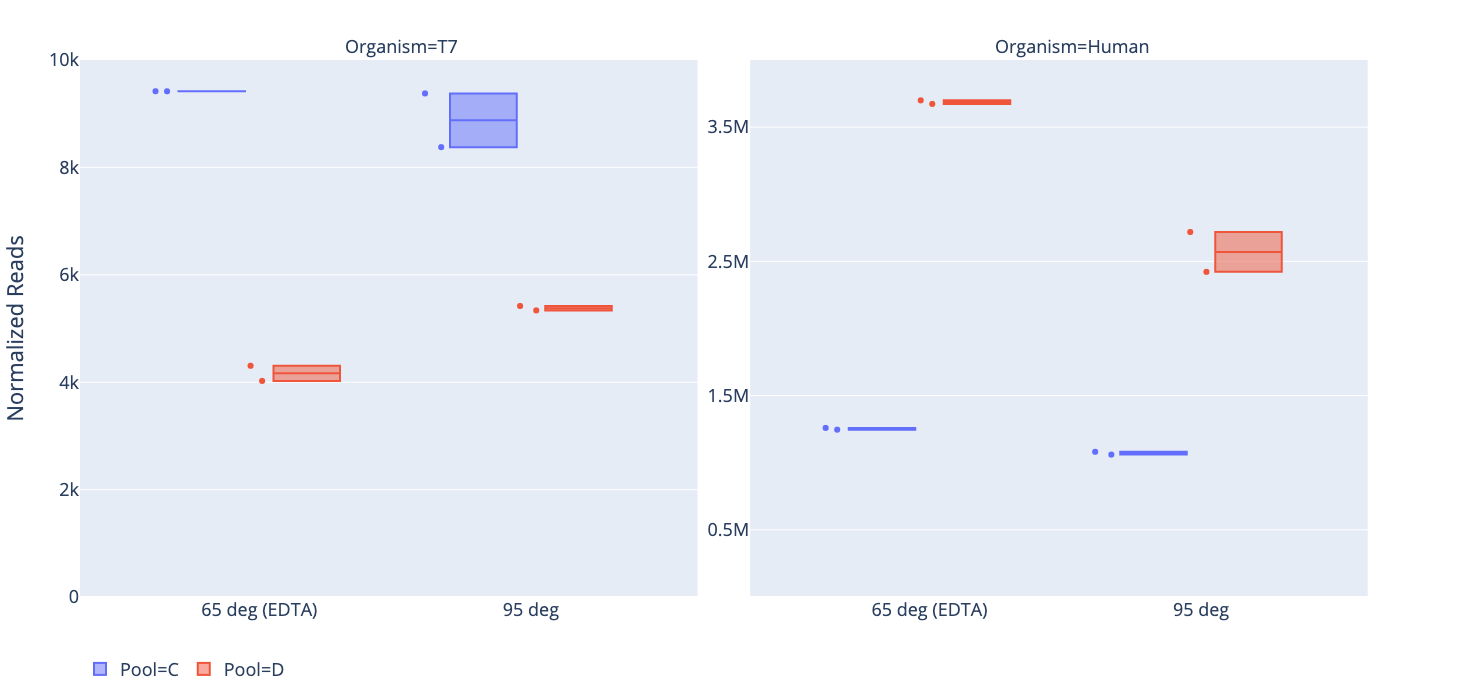

In [109]:
melt = pd.melt(
    merged,
    value_vars=['t7_normalized_reads', 'Human', 'ecoli_normalized_reads'],
    id_vars=['Accession', 'Deact temp', 'centrifugation', 'Pool'],
    value_name='Normalized Reads',
    var_name='Organism'
)
melt = melt.replace({
    't7_normalized_reads': 'T7',
    'ecoli_normalized_reads': 'E.coli',
    'E.coli pos. samples': 'C',
    'K.pneumo pos. samples': 'D'
})

# fig = px.box(melt, facet_col='Organism', x='centrifugation', y='Normalized Reads', color='Deact temp', facet_row='Pool',
#              category_orders={'centrifugation': ['No Spin', '100g', '200g']}, points='all')
fig = px.box(melt[(melt['centrifugation'] == 'No Spin') & ~(melt['Organism'] == 'E.coli')], facet_col='Organism', x='Deact temp', y='Normalized Reads', color='Pool',
             category_orders={'Deact temp': ['65 deg (EDTA)', '95 deg']}, points='all', labels={'E.coli pos. samples': 'C', 'K.pneumo pos. samples': 'D'})
fig.update_layout(height=700, font=dict(size=18), legend_orientation='h')
fig.layout.yaxis1.update(matches=None, tick0=2e3, dtick=2e3, range=[0, 10e3])
fig.layout.yaxis2.update(matches=None, showticklabels=True, tick0=5e5, dtick=1e6, range=[0, 4e6])
# fig.layout.yaxis3.update(matches=None, showticklabels=True, tick0=60e3, dtick=50e3, range=[0, 260e3])
# fig.layout.yaxis.update(matches=None, tick0=2e3)
# fig.layout.yaxis2.update(matches=None, showticklabels=True)
# fig.layout.yaxis3.update(matches=None, showticklabels=True)
# # fig.layout.yaxis4.update(matches=None, showticklabels=True)
# # fig.layout.yaxis5.update(matches=None, showticklabels=True)
# # fig.layout.yaxis6.update(matches=None, showticklabels=True)
fig.layout.xaxis.update(domain=[0, 0.47], title=None)
fig.layout.xaxis2.update(domain=[0.51, 0.98], title=None)
# fig.layout.xaxis3.update(domain=[0.666, 0.98])
# fig.layout.xaxis4.update(domain=[0, 0.293])
# fig.layout.xaxis5.update(domain=[0.333, 0.626])
# fig.layout.xaxis6.update(domain=[0.666, 0.98])
fig.show()

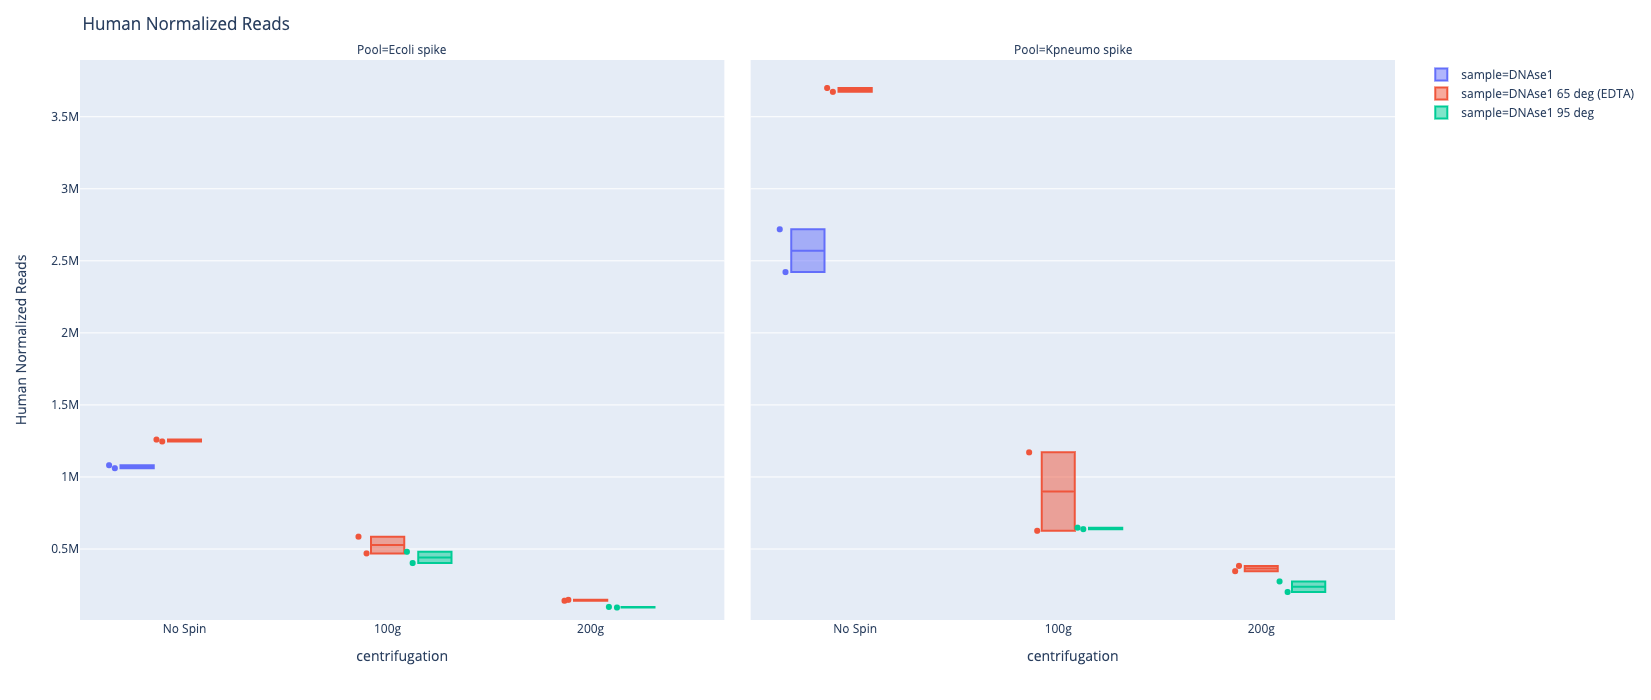

In [31]:
fig_t7 = px.box(merged, x='centrifugation', y='Human', color='sample',
                labels={'Human': 'Human Normalized Reads'}, points='all',
                facet_col='Pool', category_orders={'centrifugation': ['No Spin', '100g', '200g']})
fig_t7.update_layout(height=700, title='Human Normalized Reads')
fig_t7.show()

In [32]:
merged.columns

Index(['Accession', 'total_reads', 't7_reads', 't7_normalized_reads',
       'ecoli_reads', 'ecoli_normalized_reads', 'ecoli_coverage',
       'kpneumo_reads', 'kpneumo_normalized_reads', 'kpneumo_coverage',
       'calbicans_reads', 'calbicans_normalized_reads', 'calbicans_coverage',
       'saureus_reads', 'saureus_normalized_reads', 'saureus_coverage',
       'Human', 'Bacteria', 'Virus', 'Parasite', 'Fungus', 'Unclassified',
       'Pool', 'Pool replicate', 'sample', 'centrifugation', 'Description'],
      dtype='object')

In [91]:
merged_melt = pd.melt(merged, value_vars=['ecoli_normalized_reads', 'saureus_normalized_reads', 'kpneumo_normalized_reads', 'calbicans_normalized_reads', 'Human'],
                      id_vars=['centrifugation', 'Pool', 'Accession', 'Deact temp'],
                      value_name='Normalized reads', var_name='Organism')
merged_melt['Organism'] = merged_melt['Organism'].replace({
                 'ecoli_normalized_reads': 'E.coli',
                 'saureus_normalized_reads': 'S.aureus',
                 'kpneumo_normalized_reads': 'K.pneumo',
                 'calbicans_normalized_reads': 'C.albicans'
             })
merged_melt.head()

,centrifugation,Pool,Accession,Deact temp,Organism,Normalized reads
0,No Spin,E.coli pos. samples,IDBD-D101079,95 deg,E.coli,237484.562946
1,No Spin,E.coli pos. samples,IDBD-D101080,95 deg,E.coli,233224.257129
2,No Spin,K.pneumo pos. samples,IDBD-D101081,95 deg,E.coli,296.387970
3,No Spin,K.pneumo pos. samples,IDBD-D101082,95 deg,E.coli,13115.863644
4,No Spin,E.coli pos. samples,IDBD-D101083,65 deg (EDTA),E.coli,235920.729325


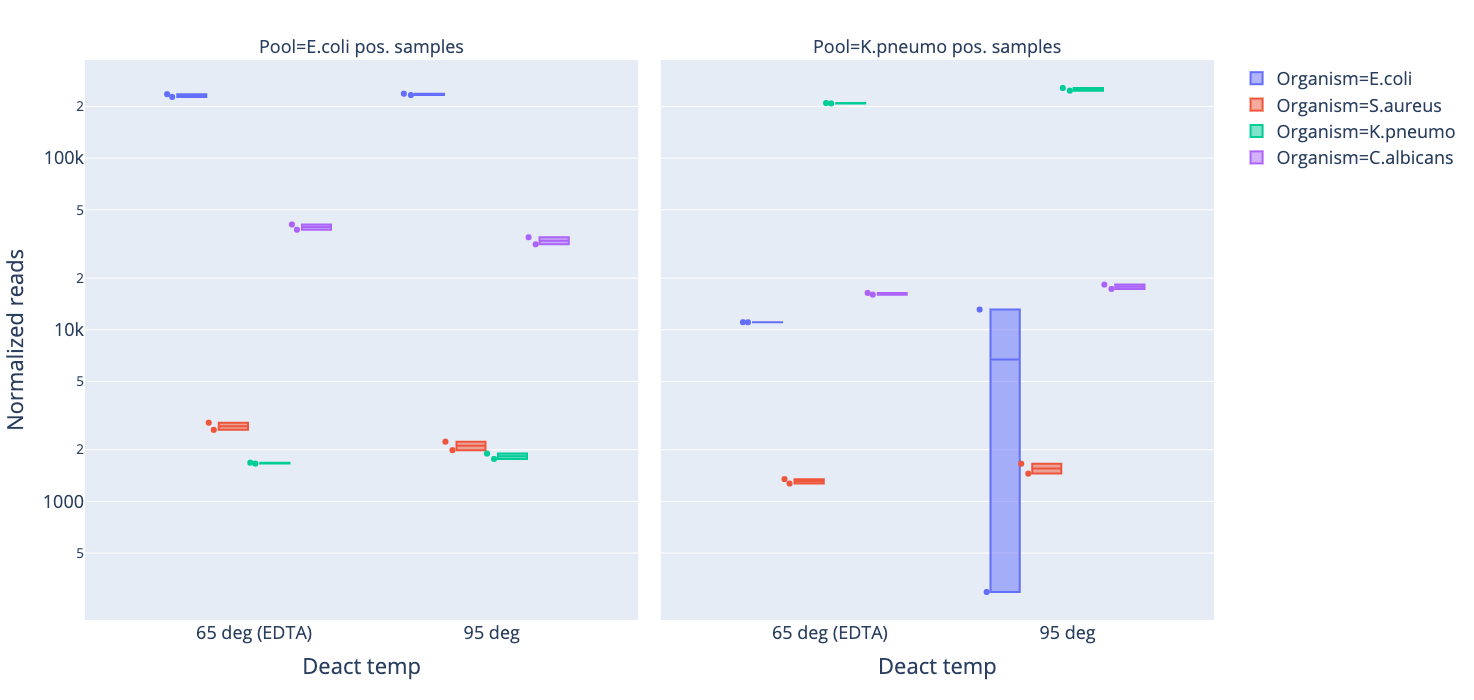

In [94]:
fig = px.box(merged_melt[~(merged_melt['Normalized reads'] == 0) & ~(merged_melt['Organism'] == 'Human') & (merged_melt['centrifugation'] == 'No Spin')],
             x='Deact temp',
             y='Normalized reads', color='Organism',
             log_y=True, facet_col='Pool', category_orders={'centrifugation': ['No Spin', '100g', '200g'], 'Deact temp': ['65 deg (EDTA)', '95 deg']},
             points='all', hover_data=['Accession'])
fig.update_layout(height=700, font=dict(size=18))
fig.show()

In [35]:
merged_melt.head()

,centrifugation,Pool,Organism,Normalized reads
0,No Spin,Ecoli spike,Ecoli,237484.562946
1,No Spin,Ecoli spike,Ecoli,233224.257129
2,No Spin,Kpneumo spike,Ecoli,296.387970
3,No Spin,Kpneumo spike,Ecoli,13115.863644
4,No Spin,Ecoli spike,Ecoli,235920.729325


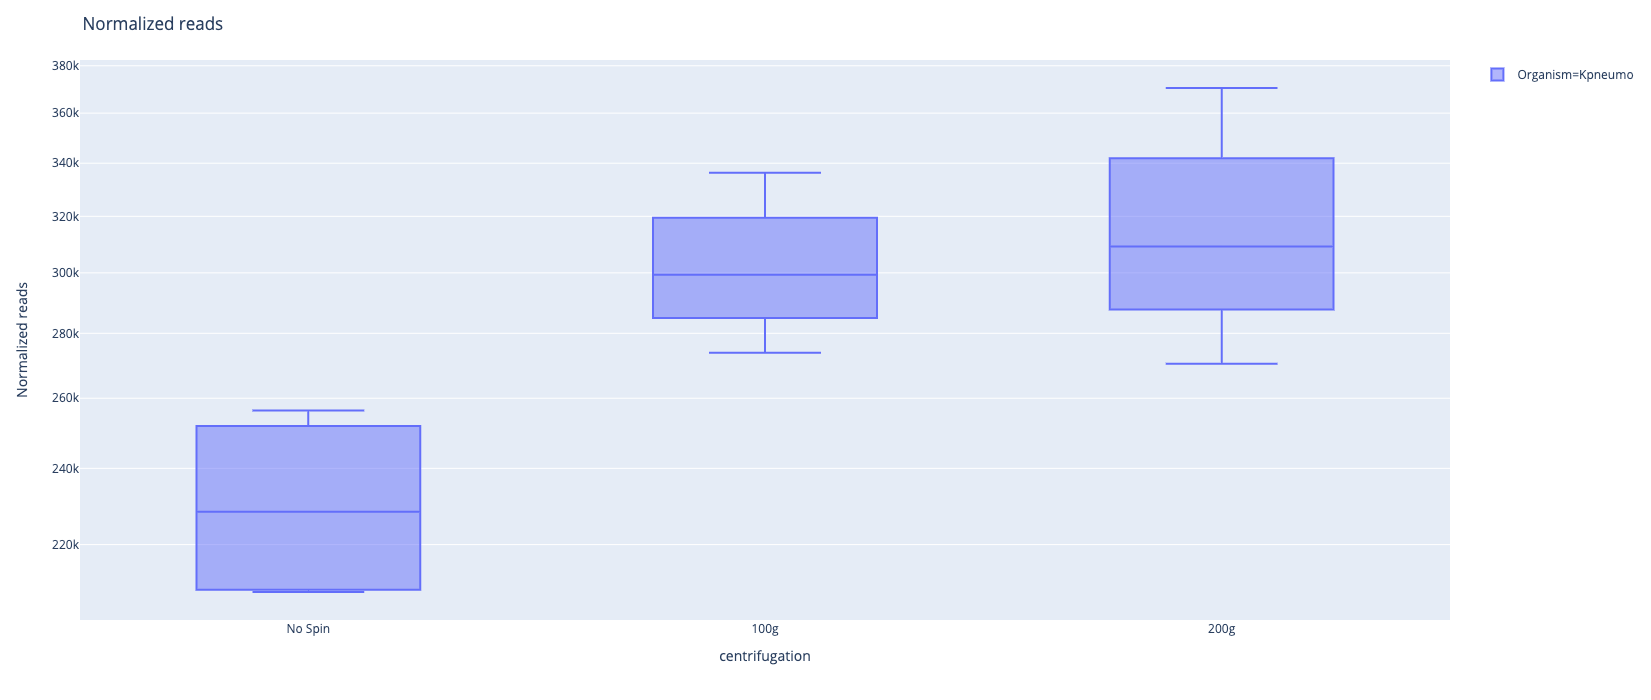

In [36]:
fig = px.box(merged_melt[(merged_melt['Organism']=='Kpneumo') & (merged_melt['Pool']=='Kpneumo spike')], x='centrifugation', y='Normalized reads', color='Organism',
             log_y=True, category_orders={'centrifugation': ['No Spin', '100g', '200g']})
fig.update_layout(height=700, title='Normalized reads')
fig.show()

In [37]:
merged_melt = pd.melt(merged, value_vars=['ecoli_coverage', 'saureus_coverage', 'kpneumo_coverage', 'calbicans_coverage'],
                      id_vars=['centrifugation', 'Pool'],
                      value_name='Coverage', var_name='Organism')
merged_melt['Organism'] = merged_melt['Organism'].replace({
                 'ecoli_coverage': 'Ecoli',
                 'saureus_coverage': 'Saureus',
                 'kpneumo_coverage': 'Kpneumo',
                 'calbicans_coverage': 'Calbicans'
             })
merged_melt.head()

,centrifugation,Pool,Organism,Coverage
0,No Spin,Ecoli spike,Ecoli,0.999776
1,No Spin,Ecoli spike,Ecoli,1.000000
2,No Spin,Kpneumo spike,Ecoli,0.000000
3,No Spin,Kpneumo spike,Ecoli,0.000000
4,No Spin,Ecoli spike,Ecoli,0.999776


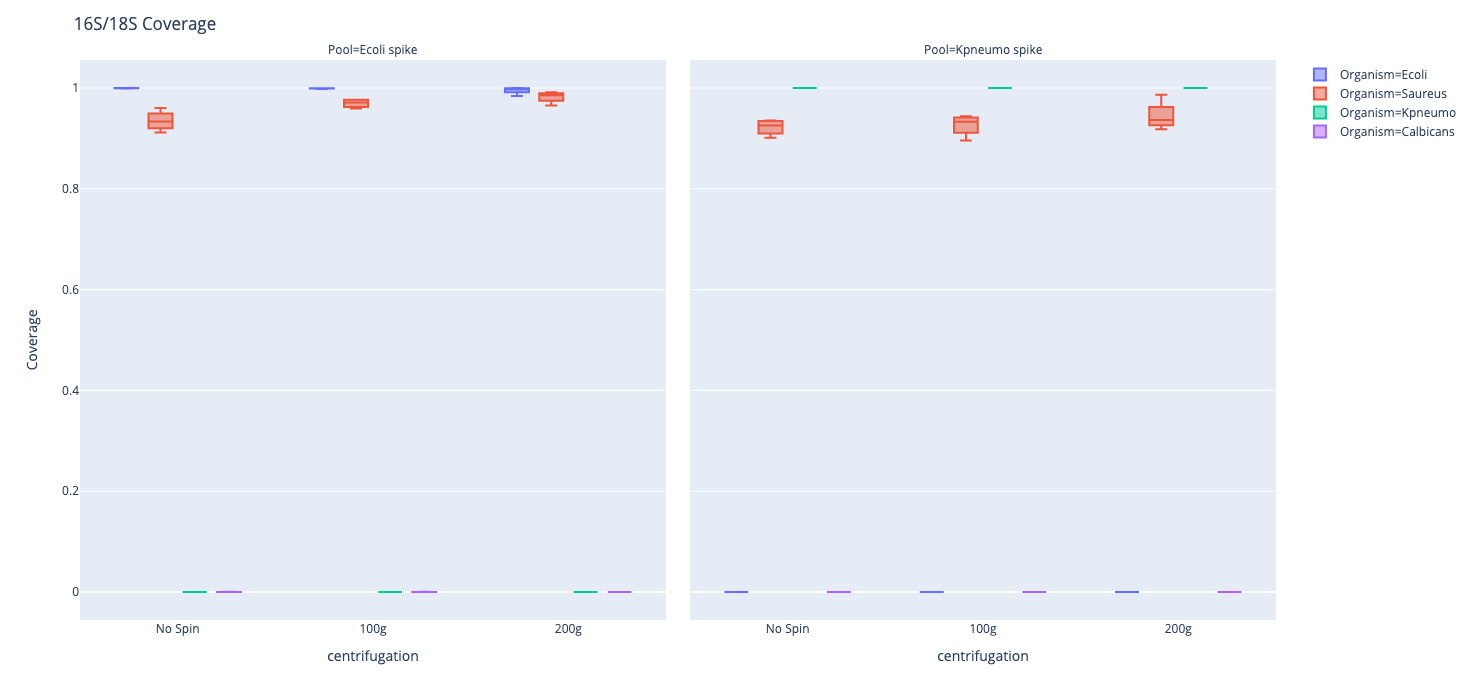

In [38]:
fig = px.box(merged_melt, x='centrifugation', y='Coverage', color='Organism',
             facet_col='Pool', category_orders={'centrifugation': ['No Spin', '100g', '200g']})
fig.update_layout(height=700,title='16S/18S Coverage')
fig.show()

In [39]:
merged_melt2 = pd.melt(merged, value_vars=['Human', 'Bacteria', 'Virus', 'Unclassified'], id_vars='Description',
                      value_name='Normalized reads', var_name='Organism')
merged_melt2.head()

,Description,Organism,Normalized reads
0,"No Spin, DNAse1, Pool 3A",Human,1.060790e+06
1,"No Spin, DNAse1, Pool 3B",Human,1.081490e+06
2,"No Spin, DNAse1, Pool 2A",Human,2.718830e+06
3,"No Spin, DNAse1, Pool 2B",Human,2.421874e+06
4,"No Spin, DNAse1 65 deg (EDTA), Pool 3A",Human,1.246384e+06


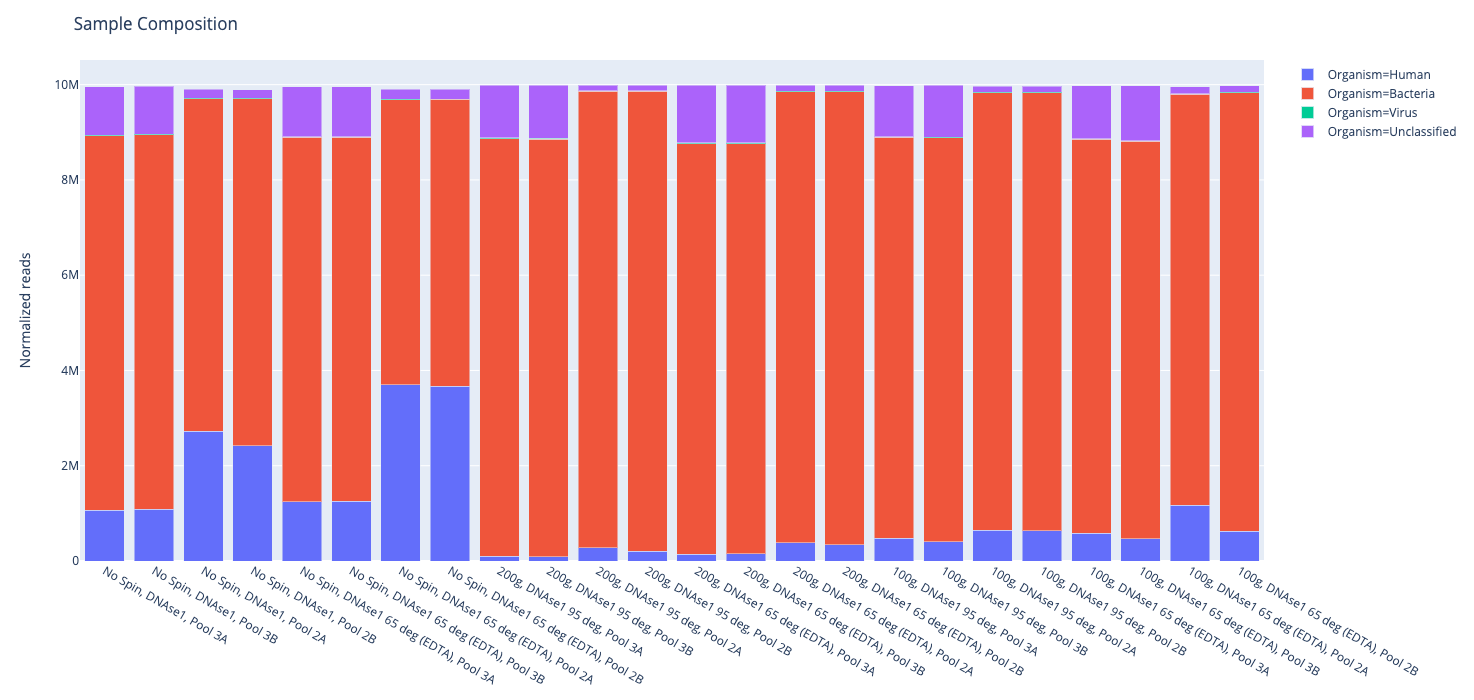

In [40]:
fig = px.bar(merged_melt2, x='Description', y='Normalized reads', color='Organism', barmode='stack')
fig.update_layout(xaxis_title=None, height=700, title='Sample Composition')
fig.show()